**Transfer learning**

Transfer learning is the task of learning representations for one task and using those
representations to improve the learning of another task. In the recent resurgence of neural
networks and deep learning in NLP, transfer learning techniques using pretrained word
vectors have become ubiquitous. 

Two methods that can be used for transfer learning are the following:

feature based transfer learning, you can train word embeddings by running a different model and then using those features (i.e. word vectors) on a different task. 

fine tuning, you can use the exact same model and just run it on a different task. Sometimes when fine tuning, you can keep the model weights fixed and just add a new layer that you will train. Other times you can slowly unfreeze the layers one at a time. You can also use unlabelled data when pre-training, by masking words and trying to predict which word was masked.

**Language Modeling**

Language modeling, simply put, is the task of predicting the next word in a sequence. 

Given the partial sentence “I thought I would arrive on time, but ended up 5 minutes ____”, it’s reasonably obvious to the reader that the next word will be a synonym of “late”. Effectively solving this task requires not only an understanding of linguistic structure (nouns follow adjectives, verbs have subjects and objects, etc.) but also the ability to make decisions based on broad contextual clues (“late” is a sensible option for filling in the blank in our example because the preceding text provides a clue that the speaker is talking about time.) In addition, language modeling has the desirable property of not requiring labeled training data. Raw text is abundantly available for every conceivable domain. These two properties make language modeling an ideal fit for learning generalizable base models.

The following are some popular language models:



**ELMo** 

In the GloVe representation, word “stick” would be represented by a certain vector no-matter what the context was. This is particularly problematic, since"stick” has multiple meanings depending on where it’s used. 

And thus a new type of deep contextualized word representation called ELMo (Embeddings from Language Models) representations were created. 

Instead of using a fixed embedding for each word, ELMo looks at the entire sentence before assigning each word in it an embedding. It uses a bi-directional LSTM trained on a specific task to be able to create those embeddings.

ELMo actually goes a step further and trains a bi-directional LSTM – so that its language model doesn’t only have a sense of the next word, but also the previous word.



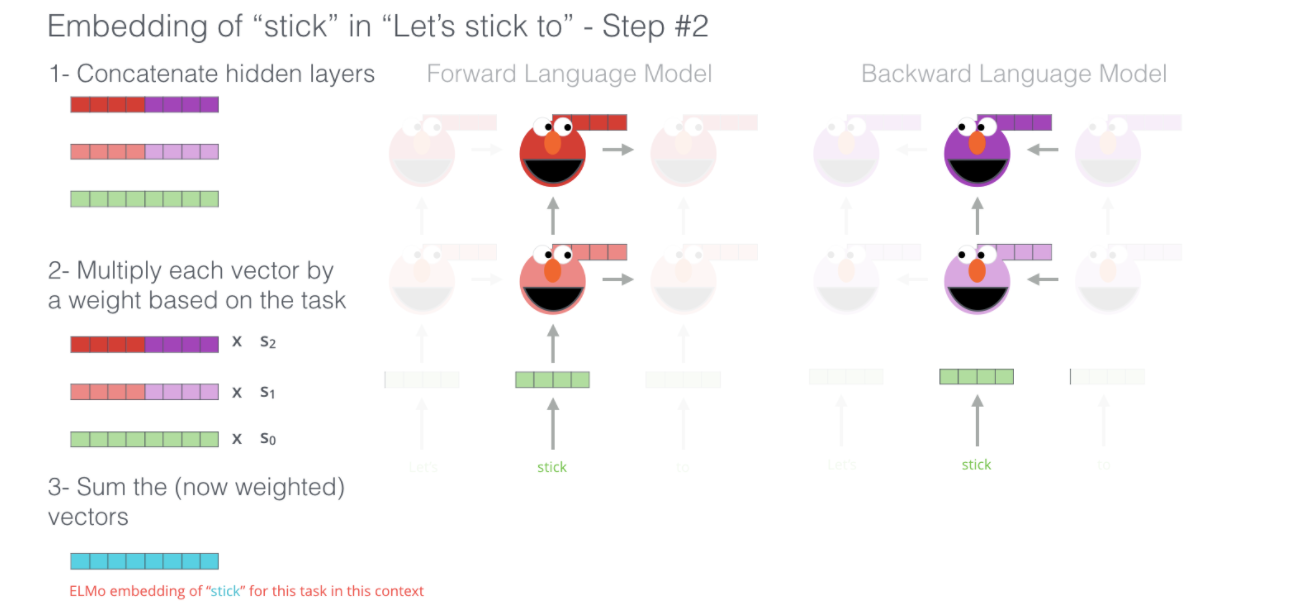

Let us see Elmo's representation in action:

In [ ]:
# import necessary libraries
import tensorflow_hub as hub
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

# Load pre trained ELMo model
elmo = hub.Module("https://tfhub.dev/google/elmo/3", trainable=True)

# create an instance of ELMo
embeddings = elmo(
	[
		"I found a stick in the woods",
		"Let us stick to the information we have"
	],
	signature="default",
	as_dict=True)["elmo"]
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

# Print word embeddings for word STICK in given two sentences
print('Word embeddings for word STICK in first sentence')
print(sess.run(embeddings[0][4]))
print('Word embeddings for word STICK in second sentence')
print(sess.run(embeddings[1][2]))


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Word embeddings for word STICK in first sentence
[-0.06449663  0.02096163 -0.1964707  ... -0.7601087   0.3207772
  0.06342275]
Word embeddings for word STICK in second sentence
[ 0.29376945 -0.74388    -0.40318912 ... -0.22902387  0.6025431
  0.13081801]


**OpenAI Transformer: Pre-training a Transformer Decoder for Language Modeling** 

It turns out that an entire Transformer is not needed to adopt transfer learning and a fine-tunable language model for NLP tasks. It can be done with just the decoder of the transformer. The decoder is a good choice because it’s a natural choice for language modeling (predicting the next word) since it’s built to mask future tokens – a valuable feature when it’s generating a translation word by word. 

The model stacked twelve decoder layers. Since there is no encoder in this set up, these decoder layers would not have the encoder-decoder attention sublayer that vanilla transformer decoder layers have. It would still have the self-attention layer, however (masked so it doesn’t peak at future tokens).

With this structure, we can proceed to train the model on the same language modeling task: predict the next word using massive (unlabeled) datasets. Just, throw the text of 7,000 books at it and have it learn! Books are great for this sort of task since it allows the model to learn to associate related information even if they’re separated by a lot of text – something you don’t get for example, when you’re training with tweets, or articles. 

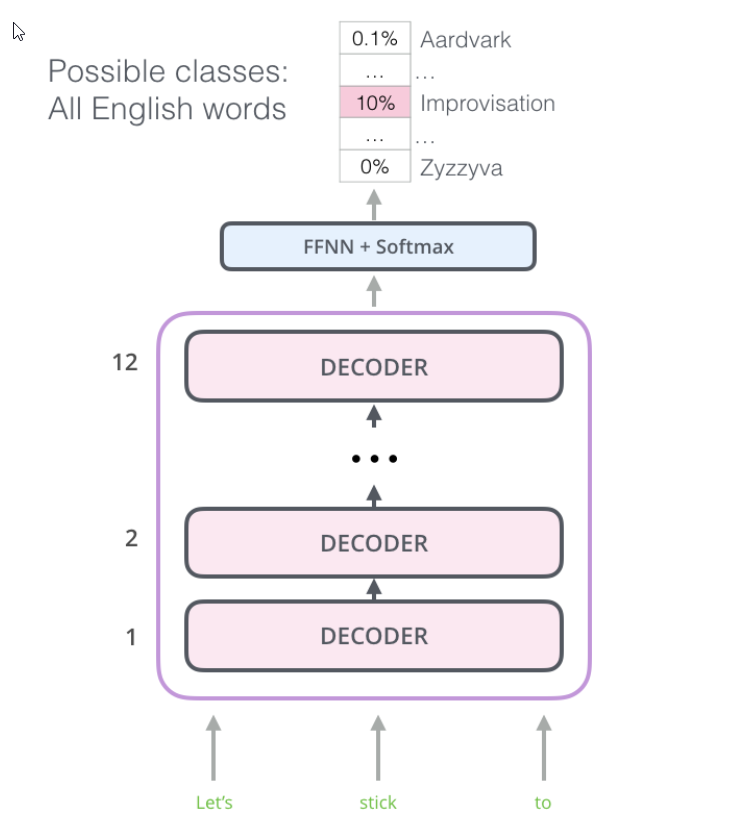

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 5.3 MB/s 
     |████████████████████████████████| 895 kB 39.1 MB/s 
     |████████████████████████████████| 61 kB 467 kB/s 
     |████████████████████████████████| 596 kB 48.7 MB/s 
     |████████████████████████████████| 3.3 MB 35.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
#Building the Model
#Initialization 

import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# initialize tokenizer and model from pretrained GPT2 model
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Tokenization
# The tokenizer is used to translate between human-readable text and numeric indices. These indices are then mapped to word embeddings (numerical representations of words) by an embedding layer within the model.

inputs = tokenizer.encode("Let's stick to", return_tensors='pt')

# Generate
# Now that we have our tokenization input text, we can begin generating text with GPT-2! 

outputs = model.generate(inputs, max_length=200, do_sample=True)

#Decoding
#Our generate step outputs an array of tokens rather than words. To convert these tokens into words, we need to .decode them. 

text = tokenizer.decode(outputs[0], skip_special_tokens=True) 
text

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'Let\'s stick to the subject. The most commonly seen pattern in this article is that, when people go to a restaurant to eat dinner, they are "following through," with "following through," while they are still eating.\n\nNow, before you go in to see their favorite breakfast restaurant, it\'s worth looking around. This is a fairly straightforward process. The way we do it is, I usually order a sandwich and there I decide to try to take it from person A to person B. The "follow through," when I go to order a sandwich, is the only thing people follow through with.\n\nIn case you\'re not familiar with the pattern, people actually follow through at very early notice. When they\'re there early, the food is very familiar to them. The one who is following through at the moment is not doing so when they\'re next at 3.\n\nIt was an interesting experience to me and if I\'d been doing it over many years,'

**BERT: From Decoders to Encoders** 

**Masked Language Modeling with BERT**

 __[BERT (Bidirectional Encoder Representations from Transformers)](https://arxiv.org/pdf/1802.05365.pdf)__ alleviates the major limitation of standard language models being unidirectional by using a “masked language model” (MLM) pre-training objective. 

The masked language model randomly masks some of the tokens from the input, and the objective is to predict the original vocabulary id of the masked word based only on its context. Unlike left-toright language model pre-training, the MLM objective enables the representation to fuse the left and the right context, which allows us to pretrain a deep bidirectional Transformer.

In order to train a deep bidirectional representation, we simply mask some percentage of the input tokens at random, and then predict those masked tokens. We refer to this procedure as a “masked LM”. In this case, the final hidden vectors corresponding to the mask tokens are fed into an output softmax over the vocabulary.  



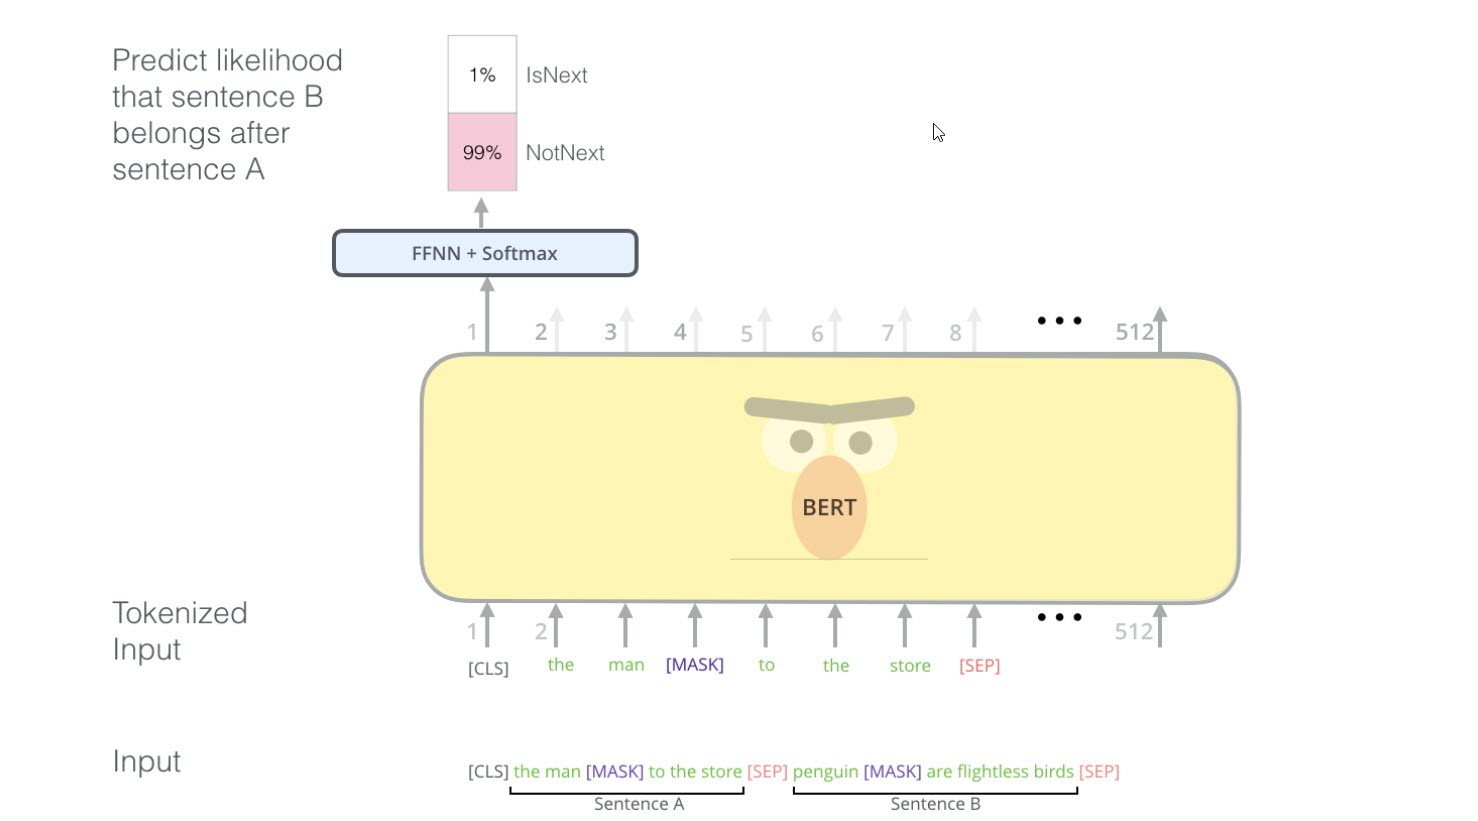

In [ ]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='bert-base-uncased')
unmasker("Hello I'm a [MASK] model.")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

[{'score': 0.10731077939271927,
  'sequence': "hello i'm a fashion model.",
  'token': 4827,
  'token_str': 'fashion'},
 {'score': 0.0877445638179779,
  'sequence': "hello i'm a role model.",
  'token': 2535,
  'token_str': 'role'},
 {'score': 0.05338413640856743,
  'sequence': "hello i'm a new model.",
  'token': 2047,
  'token_str': 'new'},
 {'score': 0.046672213822603226,
  'sequence': "hello i'm a super model.",
  'token': 3565,
  'token_str': 'super'},
 {'score': 0.027095887809991837,
  'sequence': "hello i'm a fine model.",
  'token': 2986,
  'token_str': 'fine'}]

**T5** 

__[Exploring the Limits of Transfer Learning with a Unified Text-to-Text Transformer](https://arxiv.org/abs/1910.10683)__
 
**A Shared Text-To-Text Framework** 

With T5, all NLP tasks are reframed into a unified text-to-text-format where the input and output are always text strings, in contrast to BERT-style models that can only output either a class label or a span of the input. The text-to-text framework allows to use the same model, loss function, and hyperparameters on any NLP task, including machine translation, document summarization, question answering, and classification tasks (e.g., sentiment analysis).  T5 can even be applied to regression tasks by training it to predict the string representation of a number instead of the number itself.

The model is roughly equivalent to the original Transformer proposed by
Vaswani et al. (2017) with the exception of removing the Layer Norm bias, placing the layer normalization outside the residual path, and using a different position embedding scheme.

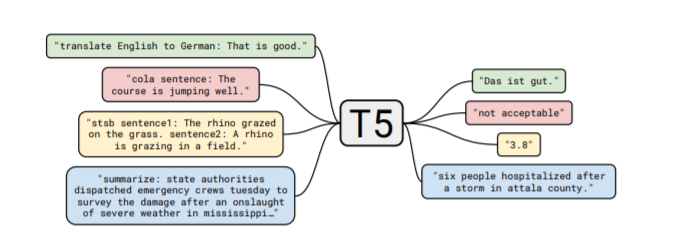

In [ ]:
!pip install sentencepiece --upgrade

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration 

tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

input_ids = tokenizer('translate English to German: The house is wonderful.', return_tensors='pt').input_ids
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))
# Das Haus ist wunderbar.

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

Das Haus ist wunderbar.
